In [3]:
#import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import plotly.graph_objects as go
import gmaps
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [4]:
#import data
data = pd.read_csv("../US_Accidents_May19.csv")
#data
data.head()
data.dtypes
data.memory_usage(deep = True)

Index                          128
ID                        68094846
Source                    68225665
TMC                        8388600
Severity                   8388600
Start_Time                75109958
End_Time                  75149500
Start_Lat                  8388600
Start_Lng                  8388600
End_Lat                    8388600
End_Lng                    8388600
Distance(mi)               8388600
Description              125827835
Number                     8388600
Street                    71552227
Side                      65011646
City                      68880725
County                    68139485
State                     61865925
Zipcode                   66508088
Country                   61865925
Timezone                  70267980
Airport_Code              63664665
Weather_Timestamp         74393495
Temperature(F)             8388600
Wind_Chill(F)              8388600
Humidity(%)                8388600
Pressure(in)               8388600
Visibility(mi)      

In [5]:
#Check percentage of missing value in each columns
data.shape

(1048575, 49)

In [6]:
for name in data.columns:
    print(name, sum(data[name].isna())*100/2243939)

ID 0.0
Source 0.0
TMC 0.0
Severity 0.0
Start_Time 0.0
End_Time 0.0
Start_Lat 0.0
Start_Lng 0.0
End_Lat 46.72921144469613
End_Lng 46.72921144469613
Distance(mi) 0.0
Description 4.456449128073446e-05
Number 29.04588761102686
Street 0.0
Side 0.0
City 0.0012032412645798303
County 0.0
State 0.0
Zipcode 0.006239028779302824
Country 0.0
Timezone 0.02589196943410672
Airport_Code 0.4585686152787576
Weather_Timestamp 0.7857165457706292
Temperature(F) 1.0721770957231904
Wind_Chill(F) 39.00039172187836
Humidity(%) 1.119058940550523
Pressure(in) 0.9389292667937943
Visibility(mi) 1.2911670058767195
Wind_Direction 0.7860730617008751
Wind_Speed(mph) 9.252836195636334
Precipitation(in) 41.31373446426128
Weather_Condition 1.2901865870685434
Amenity 0.0
Bump 0.0
Crossing 0.0
Give_Way 0.0
Junction 0.0
No_Exit 0.0
Railway 0.0
Roundabout 0.0
Station 0.0
Stop 0.0
Traffic_Calming 0.0
Traffic_Signal 0.0
Turning_Loop 0.0
Sunrise_Sunset 0.0012923702471412993
Civil_Twilight 0.0012923702471412993
Nautical_Twilight

In [7]:
#check which data will give an accurate results by having at least 75% of data entry or samples
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /data.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.25]

,columns_name,missing_count,missing_ratio
8,End_Lat,1048575,1.000000
9,End_Lng,1048575,1.000000
12,Number,651772,0.621579
24,Wind_Chill(F),875145,0.834604
30,Precipitation(in),927055,0.884109


In [8]:
# trim data set to states and other weather conditions
data_clean = data.drop(columns=["ID","TMC", "End_Lat","End_Lng","Distance(mi)","Description","Number","Street","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Wind_Chill(F)", "Precipitation(in)", "Amenity", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Civil_Twilight","Turning_Loop", "Nautical_Twilight","Astronomical_Twilight"])
#data_clean.to_csv('../all_states.csv')
data_clean.head(3)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Bump,Sunrise_Sunset
0,MapQuest,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,R,Dayton,Montgomery,OH,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,Night
1,MapQuest,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,L,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,10.0,Calm,NaN,Light Rain,False,Night
2,MapQuest,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,R,Williamsburg,Clermont,OH,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,Night


In [9]:
#clean the data by removing Nans
# data_clean.dropna(subset = ['Visibility(mi)'])
# data_clean.dropna(subset = ['Wind_Speed(mph)'])
data_clean.dropna(axis = "columns")
data_clean.head()


,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Bump,Sunrise_Sunset
0,MapQuest,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,R,Dayton,Montgomery,OH,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,Night
1,MapQuest,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,L,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,10.0,Calm,NaN,Light Rain,False,Night
2,MapQuest,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,R,Williamsburg,Clermont,OH,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,Night
3,MapQuest,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,R,Dayton,Montgomery,OH,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,Night
4,MapQuest,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,R,Dayton,Montgomery,OH,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,Day


In [10]:
#get Georgia only
ga_only = data_clean[data_clean['State']=='GA']
#ga_only.to_csv('../ga_only.csv')
ga_only.head()


,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Bump,Sunrise_Sunset
146261,MapQuest,3,11/30/2016 15:13,11/30/2016 17:26,33.546177,-84.577347,R,Fairburn,Fulton,GA,63.0,97.0,29.75,3.0,WSW,9.2,Rain,False,Day
146262,MapQuest,3,11/30/2016 15:25,11/30/2016 16:54,33.766376,-84.527321,R,Atlanta,Fulton,GA,63.0,90.0,29.73,3.0,SSW,5.8,Rain,False,Day
146263,MapQuest,3,11/30/2016 14:42,11/30/2016 16:57,33.786896,-84.493134,R,Atlanta,Fulton,GA,63.0,90.0,29.73,2.5,SSW,8.1,Heavy Rain,False,Day
146264,MapQuest,2,11/30/2016 16:27,11/30/2016 16:57,33.697849,-84.418266,R,Atlanta,Fulton,GA,63.0,97.0,29.77,9.0,WSW,10.4,Overcast,False,Day
146265,MapQuest,3,11/30/2016 16:14,11/30/2016 16:58,33.696915,-84.404984,R,Atlanta,Fulton,GA,63.0,97.0,29.70,10.0,SW,8.1,Light Rain,False,Day


In [18]:
ga_only2 = ga_only.drop(columns=["Source", 'Side','City','County','State','Bump','Sunrise_Sunset'])
ga_only2.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
146261,3,11/30/2016 15:13,11/30/2016 17:26,33.546177,-84.577347,63.0,97.0,29.75,3.0,WSW,9.2,Rain
146262,3,11/30/2016 15:25,11/30/2016 16:54,33.766376,-84.527321,63.0,90.0,29.73,3.0,SSW,5.8,Rain
146263,3,11/30/2016 14:42,11/30/2016 16:57,33.786896,-84.493134,63.0,90.0,29.73,2.5,SSW,8.1,Heavy Rain
146264,2,11/30/2016 16:27,11/30/2016 16:57,33.697849,-84.418266,63.0,97.0,29.77,9.0,WSW,10.4,Overcast
146265,3,11/30/2016 16:14,11/30/2016 16:58,33.696915,-84.404984,63.0,97.0,29.70,10.0,SW,8.1,Light Rain


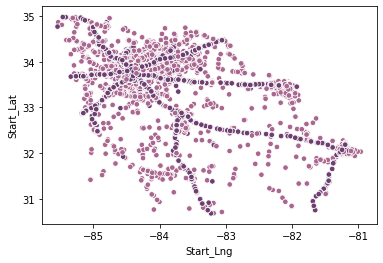

In [27]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=ga_only, hue='Severity', legend=False, s=30)
#plt.show()
plt.savefig("./Georgia_map")

In [12]:
Temperature = ga_only2['Temperature(F)']
Severity_1_ga_only2 = ga_only2[ga_only2['Severity']==1]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Severity']==2]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Severity']==3]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Severity']==4]['Severity'].count()
Severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]


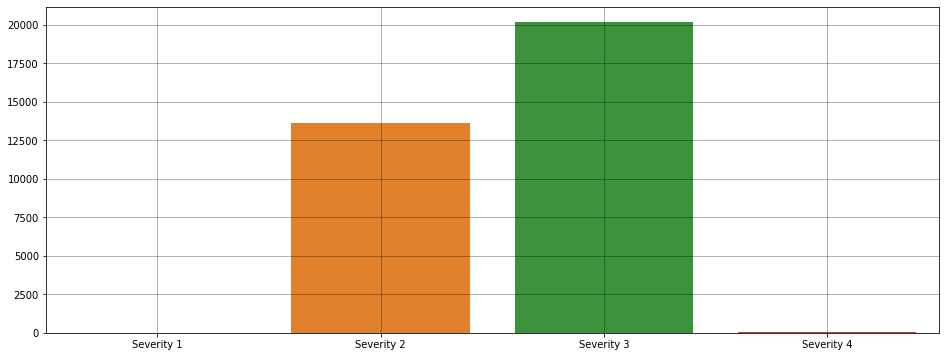

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
#plt.savefig("./Severity")

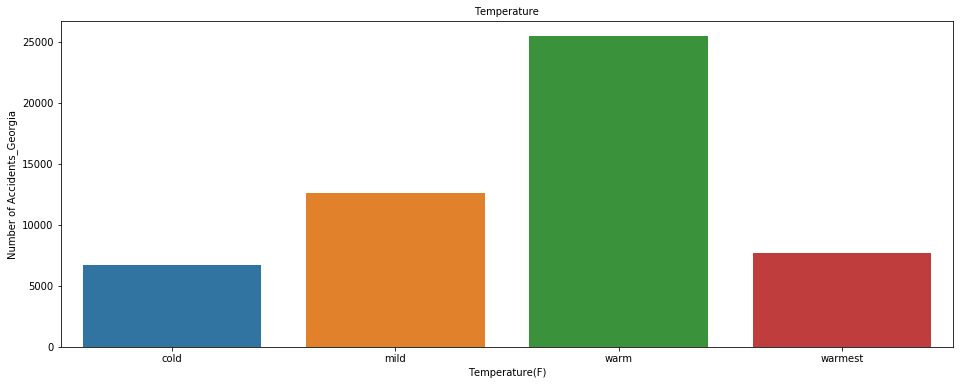

In [14]:
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Temperature(F)']<50]['Temperature(F)'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Temperature(F)']<60]['Temperature(F)'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Temperature(F)']<80]['Temperature(F)'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Temperature(F)']>80]['Temperature(F)'].count()
Severity_labels = ['cold', 'mild', 'warm', 'warmest']
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
plt.xlabel('Temperature(F)',fontsize=10)
plt.ylabel('Number of Accidents_Georgia',fontsize=10)
plt.title('Temperature',fontsize=10)
plt.grid()
plt.ioff()
plt.savefig("./Temperature")

In [28]:
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Humidity(%)']<25]['Humidity(%)'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Humidity(%)']<50]['Humidity(%)'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Humidity(%)']<=80]['Humidity(%)'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Humidity(%)']>100]['Humidity(%)'].count()
Severity_labels = ['<25%', '<50%', '<75%', '<100%']
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]

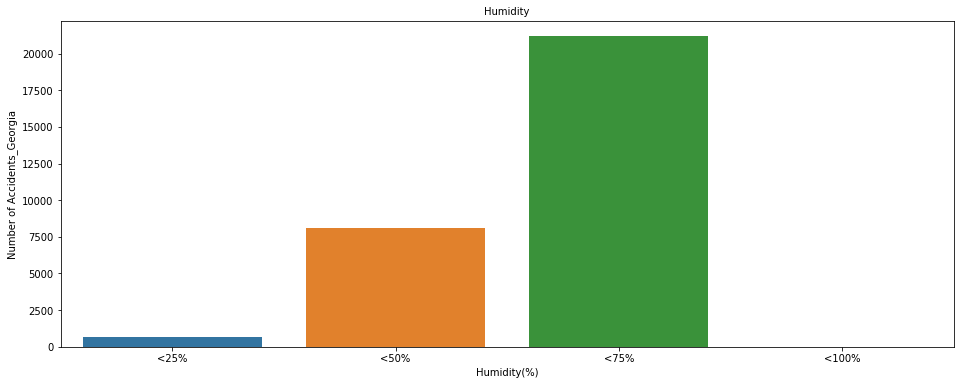

In [29]:
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
plt.xlabel('Humidity(%)',fontsize=10)
plt.ylabel('Number of Accidents_Georgia',fontsize=10)
plt.title('Humidity',fontsize=10)
plt.grid()
plt.ioff()
plt.savefig("./Humidity")

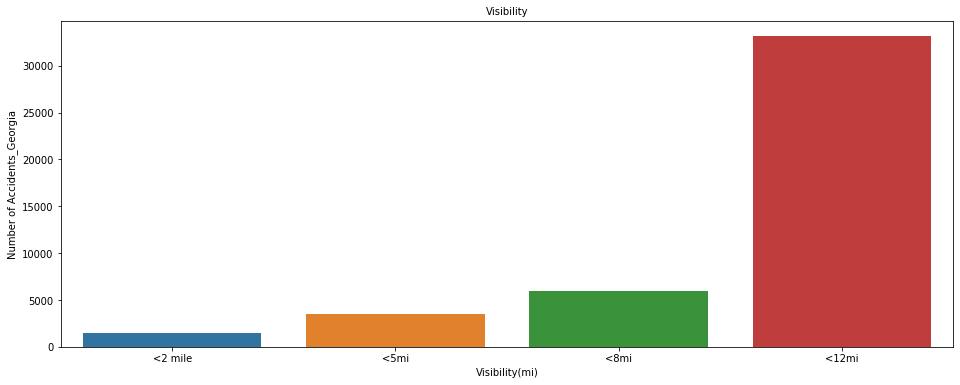

In [15]:
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<=2]['Visibility(mi)'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<=5]['Visibility(mi)'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<=8]['Visibility(mi)'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<=12]['Visibility(mi)'].count()
Severity_labels = ['<2 mile', '<5mi', '<8mi', '<12mi']
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
plt.xlabel('Visibility(mi)',fontsize=10)
plt.ylabel('Number of Accidents_Georgia',fontsize=10)
plt.title('Visibility',fontsize=10)
plt.grid()
plt.ioff()
plt.savefig("./Visibility")

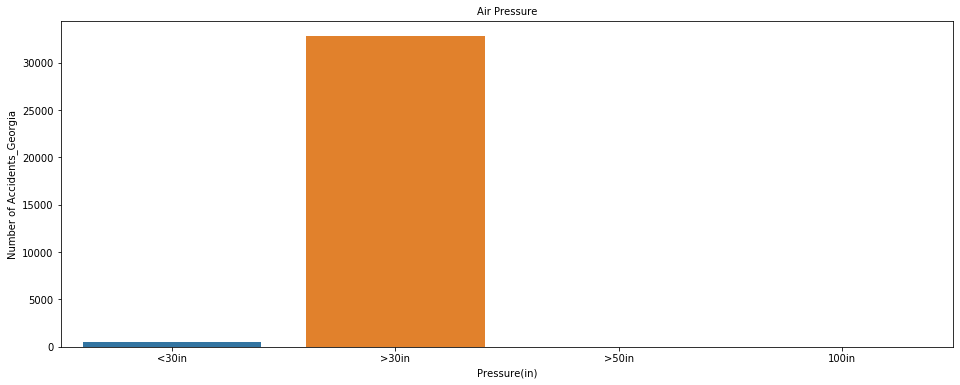

In [39]:
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Pressure(in)']<=29.54]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Pressure(in)']>=29.54]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Pressure(in)']>=50]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Pressure(in)']>=100]['Severity'].count()
Severity_labels = ['<30in', '>30in', '>50in', "100in"]
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
plt.xlabel('Pressure(in)',fontsize=10)
plt.ylabel('Number of Accidents_Georgia',fontsize=10)
plt.title('Air Pressure',fontsize=10)
plt.grid()
plt.ioff()
plt.savefig("./Pressure")


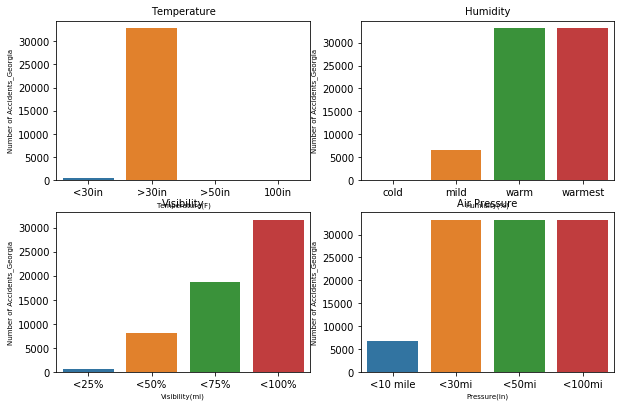

In [117]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


plt.subplot2grid(fig_dims, (0, 0))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.4)
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Temperature(F)']<10]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Temperature(F)']<50]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Temperature(F)']<100]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Temperature(F)']<200]['Severity'].count()
Severity_labels = ['cold', 'mild', 'warm', 'warmest']

Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.xlabel('Temperature(F)',fontsize=7)
plt.ylabel('Number of Accidents_Georgia',fontsize=7)
plt.title('Temperature',fontsize=10)
plt.grid()
plt.ioff()




plt.subplot2grid(fig_dims, (0, 1))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Humidity(%)']<25]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Humidity(%)']<50]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Humidity(%)']<75]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Humidity(%)']<100]['Severity'].count()
Severity_labels = ['<25%', '<50%', '<75%', '<100%']
plt.xlabel('Humidity(%)',fontsize=7)
plt.ylabel('Number of Accidents_Georgia',fontsize=7)
plt.title('Humidity',fontsize=10)
plt.grid()
plt.ioff()
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]




plt.subplot2grid(fig_dims, (1, 0))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<10]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<30]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<50]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Visibility(mi)']<100]['Severity'].count()
Severity_labels = ['<10 mile', '<30mi', '<50mi', '<100mi']
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.xlabel('Visibility(mi)',fontsize=7)
plt.ylabel('Number of Accidents_Georgia',fontsize=7)
plt.title('Visibility',fontsize=10)
plt.grid()
plt.ioff()



plt.subplot2grid(fig_dims, (1, 1))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
Temperature = ga_only2['Severity']
Severity_1_ga_only2 = ga_only2[ga_only2['Pressure(in)']<=29.54]['Severity'].count()
Severity_2_ga_only2 = ga_only2[ga_only2['Pressure(in)']>29.54]['Severity'].count()
Severity_3_ga_only2 = ga_only2[ga_only2['Pressure(in)']>50]['Severity'].count()
Severity_4_ga_only2 = ga_only2[ga_only2['Pressure(in)']>100]['Severity'].count()
Severity_labels = ['<30in', '>30in', '>50in', "100in"]
Mean_temp_by_severity = [Severity_1_ga_only2, Severity_2_ga_only2, Severity_3_ga_only2, Severity_4_ga_only2]
plt.xlabel('Pressure(in)',fontsize=7)
plt.ylabel('Number of Accidents_Georgia',fontsize=7)
plt.title('Air Pressure',fontsize=10)
plt.grid()
plt.ioff()

